In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from kaggle_environments import make

import requests  # Check internet connectivity (optional)

# ensure we are on the latest version of kaggle-environments 
!pip install --upgrade kaggle-environments
!pip install --upgrade pygame

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No pygame installed, ignoring import


In [155]:
import numpy as np
from kaggle_environments import make
from Chessnut import Game

def generate_move_map(game):
  """Génère un dictionnaire mappant les coups légaux à des indices uniques.

  Args:
    game: Un objet Chessnut Game représentant une position d'échecs.

  Returns:
    Un dictionnaire où les clés sont des chaînes de caractères représentant les coups
    et les valeurs sont des indices uniques.
  """

  move_map = {}
  index = 0
  for move in game.get_moves():
    move_map[move.uci()] = index
    index += 1

  return move_map

def preprocess_board(fen):
  """Convertit une chaîne FEN en un tableau NumPy représentant l'échiquier.

  Args:
    fen: Une chaîne Forsyth-Edwards Notation représentant une position d'échecs.

  Returns:
    Un tableau NumPy de forme (8, 8, 12) représentant l'échiquier.
  """

  piece_map = {'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
              'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11}
  board_array = np.zeros((8, 8, 12))
  n = 0
  row = 0
  col = 0
  for char in fen:
      if n<=8:
          if char.isdigit():
              col += int(char)
              n += int(char)
          elif char == '/':
              row += 1
              col = 0
              n = 0
          else:
              if char != ' ':
                  board_array[row, col, piece_map[char]] = 1
                  col += 1
                  n += 1
              else: n = 10

  return board_array.astype(np.float32)

def generate_training_data(num_games):
  """Génère des parties d'échecs aléatoires et les prétraite pour l'entraînement.

  Args:
    num_games: Nombre de parties à générer.

  Returns:
    Un tuple (positions, coups) où positions est une liste de tableaux NumPy
    représentant les échiquiers et coups est une liste de vecteurs one-hot représentant les coups.
  """

  all_positions = []
  all_moves = []
  env = make("chess", debug=False)

  for _ in range(num_games):
    result = env.run(["random", "random"])
    game = Game(result[0]["observation"]["board"])
    move_map = generate_move_map(game)  # Générer le mappage des coups pour cette partie

    for step in result:
      board_state = step[0]["observation"]["board"]
      move = step[0]["action"]
      
      # Encodage one-hot du coup en utilisant le mappage généré
      encoded_move = np.zeros(len(move_map))
      if move in move_map:
        index = move_map[move]
        encoded_move[index] = 1
      else:
        # Gérer les coups invalides (optionnel : lever une erreur ou retourner un vecteur spécial)
        pass

      # Prétraitement de l'état de l'échiquier
      preprocessed_board = preprocess_board(board_state)

      all_positions.append(preprocessed_board)
      all_moves.append(encoded_move.astype(np.float32))

  return np.array(all_positions), np.array(all_moves)

# Exemple d'utilisation :
# num_games = 1
# positions, moves = generate_training_data(num_games)


In [5]:
import numpy as np
from kaggle_environments import make
from Chessnut import Game

def generate_random_games(num_games):
  """Generates random chess games and preprocesses board and move data.

  Args:
    num_games (int): Number of games to generate.

  Returns:
    tuple: A tuple containing two NumPy arrays:
      - all_positions (np.ndarray): Array of shape (num_games, 8, 8, 12) representing all chessboard positions.
      - all_moves (np.ndarray): Array of shape (num_games, 2, max_moves) representing one-hot encoded moves for both players.
  """

  env = make("chess", debug=False)
  all_positions = []
  all_moves = []

  for _ in range(num_games):
    result = env.run(["random", "random"])

    # Process each step of the game
    for step in result:
      board_state_p1 = step[0]["observation"]["board"]
      board_state_p2 = step[1]["observation"]["board"]
      move_p1 = step[0]["action"]
      move_p2 = step[1]["action"]

      # Preprocess board states
      preprocessed_board_p1 = preprocess_board(board_state_p1)
      preprocessed_board_p2 = preprocess_board(board_state_p2)

      # Encode moves (assuming limited move history)
      encoded_move_p1 = np.zeros(max_moves)  # Adjust max_moves as needed
      encoded_move_p2 = np.zeros(max_moves)

      
      # movesp1 = list(game1.get_moves())
      # movesp2 = list(game2.get_moves())
      # move_mapp1 = {movep1: i for i, movep1 in enumerate(movesp1)}
      # move_mapp2 = {movep2: j for j, movep2 in enumerate(movesp2)}
      
      encoded_move_p1[move_p1.uci()] = 1  # One-hot encoding
      encoded_move_p2[move_p2.uci()] = 1

      # Append to data structures
      all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
      all_moves.append([encoded_move_p1, encoded_move_p2])

  return np.array(all_positions), np.array(all_moves)

In [38]:
max_moves = 5
encoded_move_p1 = np.zeros(max_moves)  # Adjust max_moves as needed
encoded_move_p2 = np.zeros(max_moves)
print(encoded_move_p1)
a = []
a.append("bonjour")
a.append("bonsoir")
move_mapp1 = {movep1: i for i, movep1 in enumerate(a)}

# move_mapp1["bonjour"] = 1
print(move_mapp1)
# movesp1 = list(game1.get_moves())
# movesp2 = list(game2.get_moves())
# move_mapp1 = {movep1: i for i, movep1 in enumerate(movesp1)}
# move_mapp2 = {movep2: j for j, movep2 in enumerate(movesp2)}

# encoded_move_p1[move_p1.uci()] = 1  # One-hot encoding
# encoded_move_p2[move_p2.uci()] = 1


[0. 0. 0. 0. 0.]
{'bonjour': 0, 'bonsoir': 1}


In [83]:

board = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"
# board = "p6p/2kr2nr/b2p1b1Q/qPp1pp2/1P2Pp1P/2P5/R2PKP2/1NB2BNR w - - 0 17"
# print(board[0])

piece_map = {'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
               'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11}
board_array = np.zeros((8, 8, 12))
n = 0
row = 0
col = 0
for char in board :
    if n<=8 :
        if char.isdigit():
            col += int(char)
            n += int(char)
        elif char == '/':
            row += 1
            col = 0
            n = 0
        else:
            if char != ' ':
                board_array[row, col, piece_map[char]] = 1
                col += 1
                n += 1
            else: n = 10

print(board_array)
# for i in range(8):
#     # print("\n")
#     for j in range(8):
#         print(board[i*8+j])  2kr2nr/p6p/b2p1b1Q/qPp1pp2/1P2Pp1P/2P5/R2PKP2/1NB2BNR w - - 0 17

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [156]:
# def preprocess(board):
#   """Converts a string representation of the chess board to a numpy array
#      suitable for CNN input.

#      Args:
#        board: String representation of the chess board.

#      Returns:
#        A numpy array of shape (8, 8, 12) representing the chess board.
#   """
#   piece_map = {'.': 0, 'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
#                'p': 7, 'n': 8, 'b': 9, 'r': 10, 'q': 11, 'k': 12}
#   board_array = np.zeros((8, 8, 12))
#   for i in range(8):
#     for j in range(8):
#       piece = board[i * 8 + j]
#       if piece in piece_map:
#         board_array[i, j, piece_map[piece]] = 1
#   return board_array.astype(np.float32)

# preprocess("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1")

In [157]:
# def preprocess_board(board):
#   """Converts a string representation of the chess board to a numpy array
#      suitable for CNN input.

#      Args:
#        board: String representation of the chess board.

#      Returns:
#        A numpy array of shape (8, 8, 12) representing the chess board.
#   """
#   piece_map = {'.': 0, 'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
#                'p': 7, 'n': 8, 'b': 9, 'r': 10, 'q': 11, 'k': 12}
#   board_array = np.zeros((8, 8, 12))
#   for i in range(8):
#     for j in range(8):
#       piece = board[i * 8 + j]
#       if piece in piece_map:
#         board_array[i, j, piece_map[piece]] = 1
#   return board_array.astype(np.float32)


def preprocess_board(fen):
    """
    Converts a FEN string into a numpy array suitable for a CNN.

    Args:
        fen: A Forsyth-Edwards Notation string representing a chess position.

    Returns:
        A numpy array of shape (8, 8, 12) representing the chess board.
    """

    
    piece_map = {'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
                'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11}
    board_array = np.zeros((8, 8, 12))
    n = 0
    row = 0
    col = 0
    for char in fen :
        if n<=8 :
            if char.isdigit():
                col += int(char)
                n += int(char)
            elif char == '/':
                row += 1
                col = 0
                n = 0
            else:
                if char != ' ':
                    board_array[row, col, piece_map[char]] = 1
                    col += 1
                    n += 1
                else: n = 10

    return board_array.astype(np.float32)

In [158]:
# import numpy as np
# from kaggle_environments import make
# from Chessnut import Game

# def generate_random_gamest(num_games):
#   env = make("chess", debug=False)
#   all_positions = []
#   all_moves = []
#   for _ in range(num_games):
#     result = env.run(["random", "random"])
#     print(result)
#     for step in result:
#         game1 = Game(step[0]["observation"]["board"])
#         game2 = Game(step[1]["observation"]["board"])
#         movep1 = step[0]["action"]
#         movep2 = step[1]["action"]
#         movesp1 = list(game1.get_moves())
#         movesp2 = list(game2.get_moves())
#         move_mapp1 = {movep1: i for i, movep1 in enumerate(movesp1)}
#         move_mapp2 = {movep2: j for j, movep2 in enumerate(movesp2)}
#         # print(step[0]["action"])
#         # print(game)
#         # print(step[0]["action"])
#         # print(np.shape(step))
#   return all_positions, all_moves

# # Générer 100 000 parties
# generate_random_gamest(1)

In [138]:
import numpy as np
from kaggle_environments import make
from Chessnut import Game

def generate_random_games2(num_games):
    """Generates random chess games and preprocesses board and move data.

    Args:
        num_games (int): Number of games to generate.

    Returns:
        tuple: A tuple containing three elements:
            - all_positions (np.ndarray): Array of shape (num_games, 8, 8, 12) representing all chessboard positions.
            - all_moves (np.ndarray): Array of shape (num_games, 2, max_moves) representing one-hot encoded moves for both players.
            - all_legal_moves (list): List of lists of legal moves for each position.
    """

    env = make("chess", debug=False)
    all_positions = []
    all_moves = []
    all_legal_moves = []

    for _ in range(num_games):
        result = env.run(["random", "random"])
        print(result[0][0]["observation"])
        board_state_init = result[0][0]["observation"]["board"]
        game_init = Game(board_state_init)
        legal_moves_init = list(game_init.get_moves())
        print(legal_moves_init)
        for step in result:
            board_state_p1 = step[0]["observation"]["board"]
            board_state_p2 = step[1]["observation"]["board"]
            move_p1 = step[0]["action"]
            move_p2 = step[1]["action"]

            # Preprocess board states
            preprocessed_board_p1 = preprocess_board(board_state_p1)
            preprocessed_board_p2 = preprocess_board(board_state_p2)

            # Get legal moves
            game1 = Game(board_state_p1)
            game2 = Game(board_state_p2)
            legal_moves_p1 = list(game1.get_moves())
            legal_moves_p2 = list(game2.get_moves())

            # Create move mappings
            move_mapping_p1 = {move1: i for i, move1 in enumerate(legal_moves_init)}
            move_mapping_p2 = {move2: j for j, move2 in enumerate(legal_moves_p2)}
            
            # Encode moves as one-hot vectors
            max_moves_per_position = max(len(legal_moves_p1), len(legal_moves_p2), len(legal_moves_init))
            encoded_move_p1 = np.zeros(max_moves_per_position)
            encoded_move_p2 = np.zeros(max_moves_per_position)

            if move_p1 != '' : 
                encoded_move_p1[move_mapping_p1[move_p1]] = 1
            if move_p2 != '' : 
                encoded_move_p2[move_mapping_p1[move_p2]] = 1
            # encoded_move_p1[move_mapping_p1[move_p1]] = 1
            # encoded_move_p2[move_mapping_p2[move_p2]] = 1
            # if move_p1 in move_mapping_p1:
            #     print(move_mapping_p1['un'])
            # else:
            # print(move_mapping_p1['un'])
            # move_p2 = move_p2
            
            
            # print('\n\n\n etape : ', step[0]["observation"]["step"])
            # print('player : ', step[0]["observation"]["mark"])
            # print('posibilité : ', legal_moves_init)
            # print('action 1 : ', step[0]["action"])
            # print('posibilité : ', legal_moves_p1)
            # print('status 1 : ', step[0]["status"])
            # print('player : ', step[1]["observation"]["mark"])
            # print('posibilité : ', legal_moves_init)
            # print('action 2 : ', step[1]["action"])
            # print('posibilité : ', legal_moves_p2)
            # print('status 2: ', step[1]["status"])
            
            # if legal_moves_p1 == legal_moves_p2 :
            #     legal_moves_init = legal_moves_p1
            
            
            # print('move_mapping_p1 : ',move_mapping_p1)
            
            # print('move_p1 : ',move_p1)
            # if move_p1 != '' : 
            #     print('move_mapping_p1[move_p1] : ', move_mapping_p1[move_p1])
            # print('move_p2 : ', move_p2)
            # if move_p2 != '' : 
            #     print('move_mapping_p2[move_p2] : ',move_mapping_p2[move_p2])
            # print('board_state_p1 : ', board_state_p1)
            # print('board_state_p2 : ', board_state_p2)
            
            # print('move_mapping_p2 : ', move_mapping_p2)
            

            # Append to data structures
            all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
            all_moves.append([encoded_move_p1, encoded_move_p2])
            all_legal_moves.append([legal_moves_init])
            if legal_moves_p1 == legal_moves_p2 :
                legal_moves_init = legal_moves_p1
            
        print('tous les moves : ', all_moves)

    return (np.array(all_positions), all_moves, all_legal_moves)
    # return (np.array(all_positions), np.array(all_moves), all_legal_moves)

In [169]:
import os
import importlib
import numpy as np
from kaggle_environments import make
from Chessnut import Game
import random


# Dossier contenant les fichiers des bots
dossier_bots = "."

# Liste tous les fichiers Python dans le dossier
fichiers_bots = [f for f in os.listdir(dossier_bots) if f.endswith('.py')]

# Importe et instancie les bots
bots = []
for fichier in fichiers_bots:
    # module = importlib.import_module(f"{fichier[:-3]}")  # Retire l'extension .py
    bot = (f"{fichier}")  # Retire l'extension .py
    # bot = module  # Supposons que chaque fichier définit une classe Bot
    bots.append(bot)

bots
env = make("chess", debug=False)
result = env.run([bots[12], bots[0]])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
for agent in result[-2]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
print('\n',bots[random.randint(0, 14)],' vs ', bots[0], '\n')


Agent exit status/reward/time left: 
	 DONE / 1 / 8.238599999999996
	 DONE / 0 / 0.7550180000000006
	 ACTIVE / 0 / 8.276321999999997
	 INACTIVE / 0 / 0.7550180000000006



 Chess_bot__starter_submission__Muhammad_Qasim_Shabbir.py  vs  Chess_bot__Advanced_Engine_with_AB_Pruning__Shawn_Xu.py 



In [39]:
print(result[-4])

[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 5.276154999999998, 'step': 54, 'board': '4k3/r1p3p1/p5K1/3n4/4p3/8/PPP3P1/1R6 w - - 13 28', 'mark': 'white', 'opponentRemainingOverageTime': 6.9930340000000015}, 'status': 'ACTIVE'}, {'action': 'f6d5', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 6.991901000000001, 'mark': 'black', 'opponentRemainingOverageTime': 5.276154999999998, 'board': '4k3/r1p3p1/p5K1/3n4/4p3/8/PPP3P1/1R6 w - - 13 28'}, 'status': 'INACTIVE'}]


In [256]:
import numpy as np
from kaggle_environments import make
from Chessnut import Game

def generate_random_games(num_games):
    """Generates random chess games and preprocesses board and move data.

    Args:
        num_games (int): Number of games to generate.

    Returns:
        tuple: A tuple containing three elements:
            - all_positions (np.ndarray): Array of shape (num_games, 8, 8, 12) representing all chessboard positions.
            - all_moves (np.ndarray): Array of shape (num_games, 2, max_moves) representing one-hot encoded moves for both players.
            - all_legal_moves (list): List of lists of legal moves for each position.
    """

    env = make("chess", debug=False)
    all_positions = []
    all_moves = []
    all_legal_moves = []
    all_last_situation = []

    for _ in range(num_games):
        result = env.run(["random", "random"])
        # print(result[0][0]["observation"])
        board_state_init = result[0][0]["observation"]["board"]
        game_init = Game(board_state_init)
        legal_moves_init = list(game_init.get_moves())
        bs = []
        # print(legal_moves_init)
        for step in result:
            board_state_p1 = step[0]["observation"]["board"]
            board_state_p2 = step[1]["observation"]["board"]
            move_p1 = step[0]["action"]
            move_p2 = step[1]["action"]

            bs = step
            # Preprocess board states
            preprocessed_board_p1 = preprocess_board(board_state_p1)
            preprocessed_board_p2 = preprocess_board(board_state_p2)

            # Get legal moves
            game1 = Game(board_state_p1)
            game2 = Game(board_state_p2)
            legal_moves_p1 = list(game1.get_moves())
            legal_moves_p2 = list(game2.get_moves())

            # Create move mappings
            move_mapping_p1 = {move1: i for i, move1 in enumerate(legal_moves_init)}
            move_mapping_p2 = {move2: j for j, move2 in enumerate(legal_moves_p2)}
            
            # Encode moves as one-hot vectors
            max_moves_per_position = max(len(legal_moves_p1), len(legal_moves_p2), len(legal_moves_init))
            encoded_move_p1 = np.zeros(max_moves_per_position)
            encoded_move_p2 = np.zeros(max_moves_per_position)

            if move_p1 != '' : 
                encoded_move_p1[move_mapping_p1[move_p1]] = 1
            if move_p2 != '' : 
                encoded_move_p2[move_mapping_p1[move_p2]] = 1
            
            # Append to data structures
            all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
            all_moves.append([encoded_move_p1, encoded_move_p2])
            all_legal_moves.append([legal_moves_init])
            if legal_moves_p1 == legal_moves_p2 :
                legal_moves_init = legal_moves_p1
        
        data = {
            "p1": (bs[0].observation.mark, bs[0].status, bs[0].reward, bs[0].observation.remainingOverageTime),
            "p2": (bs[1].observation.mark, bs[1].status, bs[1].reward, bs[1].observation.remainingOverageTime),
        }
        all_last_situation.append(data)    
        # print('tous les moves : ', data)
    return (np.array(all_positions), all_moves, all_legal_moves, all_last_situation)
    # return (np.array(all_positions), np.array(all_moves), all_legal_moves)

In [173]:
import numpy as np
from kaggle_environments import make
from Chessnut import Game
import os
import importlib
import random


# Dossier contenant les fichiers des bots
dossier_bots = "."

# Liste tous les fichiers Python dans le dossier
fichiers_bots = [f for f in os.listdir(dossier_bots) if f.endswith('.py')]

# Importe et instancie les bots
bots = []
for fichier in fichiers_bots:
    # module = importlib.import_module(f"{fichier[:-3]}")  # Retire l'extension .py
    bot = (f"{fichier}")  # Retire l'extension .py
    # bot = module  # Supposons que chaque fichier définit une classe Bot
    bots.append(bot)
randbot = "random"
bots.append(randbot)
def generate_random_games(num_games):
    """Generates random chess games and preprocesses board and move data.

    Args:
        num_games (int): Number of games to generate.

    Returns:
        tuple: A tuple containing three elements:
            - all_positions (np.ndarray): Array of shape (num_games, 8, 8, 12) representing all chessboard positions.
            - all_moves (np.ndarray): Array of shape (num_games, 2, max_moves) representing one-hot encoded moves for both players.
            - all_legal_moves (list): List of lists of legal moves for each position.
    """

    env = make("chess", debug=False)
    all_positions = []
    all_moves = []
    all_legal_moves = []
    all_last_situation = []
    # Organise les matchs
    for i in range(len(bots)):
        for j in range(len(bots)):
            # jouer_partie(bots[i], bots[j])
            result = env.run([bots[i], bots[j]])
            # print(result[0][0]["observation"])
            board_state_init = result[0][0]["observation"]["board"]
            game_init = Game(board_state_init)
            legal_moves_init = list(game_init.get_moves())
            bs = []
            # print(legal_moves_init)
            for step in result:
                board_state_p1 = step[0]["observation"]["board"]
                board_state_p2 = step[1]["observation"]["board"]
                move_p1 = step[0]["action"]
                move_p2 = step[1]["action"]

                bs = step
                # Preprocess board states
                preprocessed_board_p1 = preprocess_board(board_state_p1)
                preprocessed_board_p2 = preprocess_board(board_state_p2)

                # Get legal moves
                game1 = Game(board_state_p1)
                game2 = Game(board_state_p2)
                legal_moves_p1 = list(game1.get_moves())
                legal_moves_p2 = list(game2.get_moves())

                # Create move mappings
                move_mapping_p1 = {move1: i for i, move1 in enumerate(legal_moves_init)}
                move_mapping_p2 = {move2: j for j, move2 in enumerate(legal_moves_p2)}
                
                # Encode moves as one-hot vectors
                max_moves_per_position = max(len(legal_moves_p1), len(legal_moves_p2), len(legal_moves_init))
                encoded_move_p1 = np.zeros(max_moves_per_position)
                encoded_move_p2 = np.zeros(max_moves_per_position)

                if move_p1 != '' : 
                    encoded_move_p1[move_mapping_p1[move_p1]] = 1
                if move_p2 != '' : 
                    encoded_move_p2[move_mapping_p1[move_p2]] = 1
                
                # Append to data structures
                all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
                all_moves.append([encoded_move_p1, encoded_move_p2])
                all_legal_moves.append([legal_moves_init])
                if legal_moves_p1 == legal_moves_p2 :
                    legal_moves_init = legal_moves_p1
            
            data = {
                "p1": (bs[0].observation.mark, bs[0].status, bs[0].reward, bs[0].observation.remainingOverageTime),
                "p2": (bs[1].observation.mark, bs[1].status, bs[1].reward, bs[1].observation.remainingOverageTime),
            }
            all_last_situation.append(data)
    
    for j in range(len(bots)):
        result = env.run([bots[12], bots[j]])
        # print(result[0][0]["observation"])
        board_state_init = result[0][0]["observation"]["board"]
        game_init = Game(board_state_init)
        legal_moves_init = list(game_init.get_moves())
        bs = []
        # print(legal_moves_init)
        for step in result:
            board_state_p1 = step[0]["observation"]["board"]
            board_state_p2 = step[1]["observation"]["board"]
            move_p1 = step[0]["action"]
            move_p2 = step[1]["action"]

            bs = step
            # Preprocess board states
            preprocessed_board_p1 = preprocess_board(board_state_p1)
            preprocessed_board_p2 = preprocess_board(board_state_p2)

            # Get legal moves
            game1 = Game(board_state_p1)
            game2 = Game(board_state_p2)
            legal_moves_p1 = list(game1.get_moves())
            legal_moves_p2 = list(game2.get_moves())

            # Create move mappings
            move_mapping_p1 = {move1: i for i, move1 in enumerate(legal_moves_init)}
            move_mapping_p2 = {move2: j for j, move2 in enumerate(legal_moves_p2)}
            
            # Encode moves as one-hot vectors
            max_moves_per_position = max(len(legal_moves_p1), len(legal_moves_p2), len(legal_moves_init))
            encoded_move_p1 = np.zeros(max_moves_per_position)
            encoded_move_p2 = np.zeros(max_moves_per_position)

            if move_p1 != '' : 
                encoded_move_p1[move_mapping_p1[move_p1]] = 1
            if move_p2 != '' : 
                encoded_move_p2[move_mapping_p1[move_p2]] = 1
            
            # Append to data structures
            all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
            all_moves.append([encoded_move_p1, encoded_move_p2])
            all_legal_moves.append([legal_moves_init])
            if legal_moves_p1 == legal_moves_p2 :
                legal_moves_init = legal_moves_p1
        
        data = {
            "p1": (bs[0].observation.mark, bs[0].status, bs[0].reward, bs[0].observation.remainingOverageTime),
            "p2": (bs[1].observation.mark, bs[1].status, bs[1].reward, bs[1].observation.remainingOverageTime),
        }
        all_last_situation.append(data)
    for j in range(len(bots)):
        result = env.run([bots[j], bots[12]])
        # print(result[0][0]["observation"])
        board_state_init = result[0][0]["observation"]["board"]
        game_init = Game(board_state_init)
        legal_moves_init = list(game_init.get_moves())
        bs = []
        # print(legal_moves_init)
        for step in result:
            board_state_p1 = step[0]["observation"]["board"]
            board_state_p2 = step[1]["observation"]["board"]
            move_p1 = step[0]["action"]
            move_p2 = step[1]["action"]

            bs = step
            # Preprocess board states
            preprocessed_board_p1 = preprocess_board(board_state_p1)
            preprocessed_board_p2 = preprocess_board(board_state_p2)

            # Get legal moves
            game1 = Game(board_state_p1)
            game2 = Game(board_state_p2)
            legal_moves_p1 = list(game1.get_moves())
            legal_moves_p2 = list(game2.get_moves())

            # Create move mappings
            move_mapping_p1 = {move1: i for i, move1 in enumerate(legal_moves_init)}
            move_mapping_p2 = {move2: j for j, move2 in enumerate(legal_moves_p2)}
            
            # Encode moves as one-hot vectors
            max_moves_per_position = max(len(legal_moves_p1), len(legal_moves_p2), len(legal_moves_init))
            encoded_move_p1 = np.zeros(max_moves_per_position)
            encoded_move_p2 = np.zeros(max_moves_per_position)

            if move_p1 != '' : 
                encoded_move_p1[move_mapping_p1[move_p1]] = 1
            if move_p2 != '' : 
                encoded_move_p2[move_mapping_p1[move_p2]] = 1
            
            # Append to data structures
            all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
            all_moves.append([encoded_move_p1, encoded_move_p2])
            all_legal_moves.append([legal_moves_init])
            if legal_moves_p1 == legal_moves_p2 :
                legal_moves_init = legal_moves_p1
        
        data = {
            "p1": (bs[0].observation.mark, bs[0].status, bs[0].reward, bs[0].observation.remainingOverageTime),
            "p2": (bs[1].observation.mark, bs[1].status, bs[1].reward, bs[1].observation.remainingOverageTime),
        }
        all_last_situation.append(data)
    for _ in range(num_games):
        result = env.run([bots[random.randint(0, 15)], [bots[random.randint(0, 15)]]])
        # print(result[0][0]["observation"])
        board_state_init = result[0][0]["observation"]["board"]
        game_init = Game(board_state_init)
        legal_moves_init = list(game_init.get_moves())
        bs = []
        # print(legal_moves_init)
        for step in result:
            board_state_p1 = step[0]["observation"]["board"]
            board_state_p2 = step[1]["observation"]["board"]
            move_p1 = step[0]["action"]
            move_p2 = step[1]["action"]

            bs = step
            # Preprocess board states
            preprocessed_board_p1 = preprocess_board(board_state_p1)
            preprocessed_board_p2 = preprocess_board(board_state_p2)

            # Get legal moves
            game1 = Game(board_state_p1)
            game2 = Game(board_state_p2)
            legal_moves_p1 = list(game1.get_moves())
            legal_moves_p2 = list(game2.get_moves())

            # Create move mappings
            move_mapping_p1 = {move1: i for i, move1 in enumerate(legal_moves_init)}
            move_mapping_p2 = {move2: j for j, move2 in enumerate(legal_moves_p2)}
            
            # Encode moves as one-hot vectors
            max_moves_per_position = max(len(legal_moves_p1), len(legal_moves_p2), len(legal_moves_init))
            encoded_move_p1 = np.zeros(max_moves_per_position)
            encoded_move_p2 = np.zeros(max_moves_per_position)

            if move_p1 != '' : 
                encoded_move_p1[move_mapping_p1[move_p1]] = 1
            if move_p2 != '' : 
                encoded_move_p2[move_mapping_p1[move_p2]] = 1
            
            # Append to data structures
            all_positions.append([preprocessed_board_p1, preprocessed_board_p2])
            all_moves.append([encoded_move_p1, encoded_move_p2])
            all_legal_moves.append([legal_moves_init])
            if legal_moves_p1 == legal_moves_p2 :
                legal_moves_init = legal_moves_p1
        
        data = {
            "p1": (bs[0].observation.mark, bs[0].status, bs[0].reward, bs[0].observation.remainingOverageTime),
            "p2": (bs[1].observation.mark, bs[1].status, bs[1].reward, bs[1].observation.remainingOverageTime),
        }
        all_last_situation.append(data)    
        # print('tous les moves : ', data)
    return (np.array(all_positions), all_moves, all_legal_moves, all_last_situation)
    # return (np.array(all_positions), np.array(all_moves), all_legal_moves)

In [171]:
# from Chessnut import Game

# # Position finale (exemple)
# fen = '8/8/2k5/5N2/5K2/8/8/8 b - - 0 138'

# # Créer une partie et configurer la position
# game = Game(fen)
# # game.set_fen(fen)


# # Vérifier l'état de la partie
# if game.is_game_over():
#     if game.is_checkmate():
#         print("Échec et mat!")
#     elif game.is_stalemate():
#         print("Pat!")
#     elif game.is_fifty_moves():
#         print("Règle des 50 coups")
#     elif game.is_threefold_repetition():
#         print("Répétition de position")
#     else:
#         print("Autre condition de fin de partie")
# else:
#     print("La partie n'est pas terminée")

In [144]:
import hashlib

# ... (code existant de generate_random_games)

def filter_redundant_games(games):
    unique_positions = set()
    filtered_games = []
    for game in games:
        for position in game:
            # Calcul du hash de la position (exemple avec un hash MD5)
            position_hash = hashlib.md5(str(position).encode('utf-8')).hexdigest()
            if position_hash not in unique_positions:
                unique_positions.add(position_hash)
                filtered_games.append(game)
    return filtered_games



In [257]:
essai =  generate_random_games(1)
essai

(array([[[[[0., 0., 0., ..., 1., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 1., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],
 
          ...,
 
          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ...,

In [174]:

all_games = generate_random_games(12)
# all_games

2024-12-23 00:19:27,345 - DEBUG - Development move: b8a6
2024-12-23 00:19:27,345 - DEBUG - Development move: b8c6
2024-12-23 00:19:27,364 - DEBUG - Development move: g8f6
2024-12-23 00:19:27,370 - DEBUG - Development move: g8h6
2024-12-23 00:19:27,447 - DEBUG - Central control move: d7d5
2024-12-23 00:19:27,447 - DEBUG - Central control move: e7e5
2024-12-23 00:19:27,501 - DEBUG - Best move selected: d7d5
2024-12-23 00:19:28,299 - DEBUG - Development move: b8a6
2024-12-23 00:19:28,299 - DEBUG - Development move: b8c6
2024-12-23 00:19:28,318 - DEBUG - Development move: b8d7
2024-12-23 00:19:28,319 - DEBUG - Development move: c8d7
2024-12-23 00:19:28,331 - DEBUG - Development move: c8e6
2024-12-23 00:19:28,331 - DEBUG - Development move: c8f5
2024-12-23 00:19:28,349 - DEBUG - Development move: c8g4
2024-12-23 00:19:28,349 - DEBUG - Development move: c8h3
2024-12-23 00:19:28,385 - DEBUG - Development move: g8f6
2024-12-23 00:19:28,393 - DEBUG - Development move: g8h6
2024-12-23 00:19:28,4

KeyError: None

In [171]:
# # Utilisation :
# all_games = generate_random_games(num_games)
filtered_games = filter_redundant_games(all_games[0])

In [172]:
filtered_games

[array([[[[0., 0., 0., ..., 1., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0.

In [178]:
print(len(all_games[0]))
print(len(filtered_games))
print(all_games[0][0][0][0])
print(filtered_games[0][0][0])

3688
3658
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


2024-12-22 18:13:35,430 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-12-22 18:13:35,580 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-12-22 18:13:36,609 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-12-22 18:13:36,723 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-12-22 18:13:36,724 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-12-22 18:13:36,724 - DEBUG - findfont

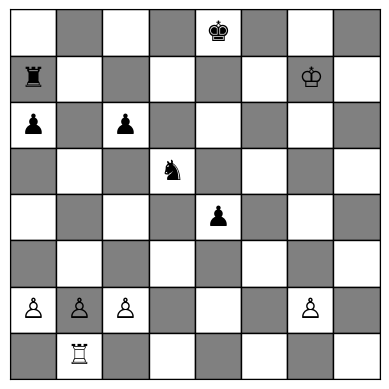

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from Chessnut import Game

# Create a new Chessnut game
game = Game()

def draw_board(game=None):
    fig, ax = plt.subplots()

    # Draw the chessboard squares
    for row in range(8):
        for col in range(8):
            color = 'white' if (row + col) % 2 == 0 else 'gray'
            square = patches.Rectangle((col, 7 - row), 1, 1, edgecolor='black', facecolor=color)
            ax.add_patch(square)

    # Set limits and turn off axes
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().set_aspect('equal', adjustable='box')

    # Display pieces based on the FEN string
    fen = game.get_fen().split()[0]
    piece_map = {
        'p': '♟', 'r': '♜', 'n': '♞', 'b': '♝', 'q': '♛', 'k': '♚',
        'P': '♙', 'R': '♖', 'N': '♘', 'B': '♗', 'Q': '♕', 'K': '♔'
    }
    board_rows = fen.split('/')

    for row, row_string in enumerate(board_rows):
        col = 0
        for char in row_string:
            if char.isdigit():
                col += int(char)  # Empty squares
            else:
                ax.text(col + 0.5, 7 - row + 0.5, piece_map[char], fontsize=20,
                        ha='center', va='center')
                col += 1

    plt.show()

# fen = '8/8/2k5/5N2/5K2/8/8/8 b - - 0 138'
fen = '4k3/r5K1/p1p5/3n4/4p3/8/PPP3P1/1R6 w - - 0 29'

# Créer une partie et configurer la position
game = Game(fen)
draw_board(game)

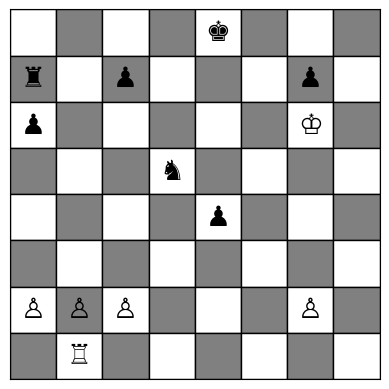

In [40]:
fen = '4k3/r1p3p1/p5K1/3n4/4p3/8/PPP3P1/1R6 w - - 13 28'

# Créer une partie et configurer la position
game = Game(fen)
draw_board(game)

In [235]:
# fen = '8/8/2k5/5N2/5K2/8/8/8 b - - 0 138'
fen = 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1'

# Créer une partie et configurer la position
game = Game(fen)
# draw_board(game)
# game.get_moves()
# attributs = vars(game)
# methodes = [attr for attr in attributs if callable(getattr(game, attr))]
# print(methodes)
# env = make("chess", debug=False)
# result = env.run(["random", "random"])
print(dir(game))
print(game)
if game.CHECKMATE :
    print("echec et mate", game.CHECKMATE)
if game.CHECK :
    print("ECHEC", game.CHECK)
if game.NORMAL :
    print("NORMAL", game.NORMAL)
if game.STALEMATE :
    print("STALEMATE", game.STALEMATE)


['CHECK', 'CHECKMATE', 'NORMAL', 'STALEMATE', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_all_moves', '_trace_ray', 'apply_move', 'board', 'default_fen', 'fen_history', 'get_fen', 'get_moves', 'i2xy', 'move_history', 'reset', 'set_fen', 'state', 'status', 'validate', 'xy2i']
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
echec et mate 2
ECHEC 1
STALEMATE 3


In [ ]:
# Generate training data (adjust num_games as needed)
positions, moves = generate_training_data(10)

# Define and compile the neural network model (same as your provided model)
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 12)),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(4096, activation='softmax')
])

model.compile(loss=CategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.001))

# Train the model on the generated data
model.fit(positions, moves, epochs=10, batch_size=32)
#///////////////////

def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='softmax')  # Ajustez le nombre de sorties
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_bot(num_games):
    positions, moves = generate_random_games(num_games)
    X, y = preprocess_data(positions, moves)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model((X_train.shape[1],))
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Exécution de l'entraînement
train_bot(1000)  # Ajustez le nombre de jeux selon vos besoins

In [ ]:
def filter_redundant_games(games):
    unique_positions = set()
    filtered_games = []
    for game in games:
        for position in game:
            # Calcul du hash de la position (exemple avec un hash MD5)
            position_hash = hashlib.md5(str(position).encode('utf-8')).hexdigest()
            if position_hash not in unique_positions:
                unique_positions.add(position_hash)
                filtered_games.append(game)
    return filtered_games

# Utilisation :
all_games = generate_random_games(num_games)
filtered_games = filter_redundant_games(all_games)

In [94]:
from kaggle_environments import make
from Chessnut import Game

def generate_move_map(fen):
  """Generates a dictionary mapping legal moves to unique indices.

  Args:
    fen: A FEN string representing the current position.

  Returns:
    A dictionary where keys are move strings and values are unique indices.
  """

  board = chessnut.Board(fen)
  move_map = {}
  index = 0
  game = Game(step[0]["observation"]["board"])
  moves = list(game.get_moves())

  for move in board.generate_moves():
    move_map[move.uci()] = index
    index += 1

  return move_map

In [40]:
def one_hot_encode_move(move):
  """One-hot encodes a chess move (string notation) into a sparse vector.

  Args:
    move: String representation of a chess move.

  Returns:
    A sparse numpy array with a 1 at the index corresponding to the move.
  """
  # Create a dictionary to map move strings to unique indices (outside the function)
  move_map = generate_move_map()  # This function would create the mapping

  # Check if move exists in the map
  if move in move_map:
    index = move_map[move]
    # Create a sparse vector with size equal to the number of possible moves
    encoded_move = np.zeros(len(move_map))
    encoded_move[index] = 1
    return encoded_move.astype(np.float32)
  else:
    # Handle invalid moves (optional: raise an error or return a special vector)
    pass

In [89]:
def generate_training_data(num_games):
  """Generates random chess games and preprocesses them for training.

     Args:
       num_games: Number of games to generate.

     Returns:
       A tuple of (positions, moves) where positions is a list of numpy arrays
       representing the chess boards and moves is a list of one-hot encoded moves.
  """
  env = make("chess", debug=False)
  all_positions = []
  all_moves = []
  for _ in range(num_games):
    result = env.run(["random", "random"])
    for step in result:
      board = step[0]["observation"]["board"]
      move = step[0]["action"]
      print(one_hot_encode_move(move))
      # all_positions.append(preprocess_board(board))
      # all_moves.append(one_hot_encode_move(move))
  return np.array(all_positions), np.array(all_moves)

In [90]:
# Generate training data (adjust num_games as needed)
positions, moves = generate_training_data(1)

NameError: name 'generate_move_map' is not defined

In [ ]:
def preprocess_board(fen):
    """
    Converts a FEN string into a numpy array suitable for a CNN.

    Args:
        fen: A Forsyth-Edwards Notation string representing a chess position.

    Returns:
        A numpy array of shape (8, 8, 12) representing the chess board.
    """

    
    piece_map = {'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
                'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11}
    board_array = np.zeros((8, 8, 12))
    n = 0
    row = 0
    col = 0
    for char in fen :
        if n<=8 :
            if char.isdigit():
                col += int(char)
                n += int(char)
            elif char == '/':
                row += 1
                col = 0
                n = 0
            else:
                if char != ' ':
                    board_array[row, col, piece_map[char]] = 1
                    col += 1
                    n += 1
                else: n = 10

    return board_array.astype(np.float32)